In [190]:
import json
# loads a file into jupyter
with open('/Users/lincolntrelease/Desktop/secrets/secrets/credentials.json') as f:
    data = json.load(f)

    connection_string = data['mongodb']
# verifies my file has loaded correctly
print(f"My connection string is {len(connection_string)} characters in length.")

My connection string is 68 characters in length.


In [191]:
pip install pymongo


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [192]:
import pymongo
import certifi

mongo_connection_string = data['mongodb']

client = pymongo.MongoClient(mongo_connection_string, tlsCAFile=certifi.where())

da320_database = client['DA_Assignment']

allCollections = da320_database.list_collection_names()

print(f"Using MongoDB version {client.server_info()['version']}.")
print(f"This database has the collections {allCollections}")

Using MongoDB version 6.0.11.
This database has the collections ['Metacritic Movies', 'IMDB Superhero', 'IMDB_Pipeline']


```
[
    {
        '$project': {
            'id': '$id', 
            'title': '$title', 
            'runtime': {
                '$convert': {
                    'input': '$runtime', 
                    'to': 'int', 
                    'onError': None
                }
            }, 
            'user_rating': {
                '$convert': {
                    'input': '$user_rating', 
                    'to': 'int', 
                    'onError': None
                }
            }, 
            'votes': {
                '$convert': {
                    'input': '$votes', 
                    'to': 'int', 
                    'onError': None
                }
            }, 
            'mpaa_rating': {
                '$split': [
                    {
                        '$toString': '$mpaa_rating'
                    }, '::'
                ]
            }, 
            'release_date': {
                '$convert': {
                    'input': '$release_date', 
                    'to': 'date', 
                    'onError': None
                }
            }, 
            'opening_weekend': {
                '$convert': {
                    'input': '$opening_weekend', 
                    'to': 'int', 
                    'onError': None
                }
            }, 
            'gross_sales': {
                '$convert': {
                    'input': '$gross_sales', 
                    'to': 'int', 
                    'onError': 0
                }
            }, 
            'genres': {
                '$map': {
                    'input': {
                        '$split': [
                            {
                                '$toString': '$genres'
                            }, ','
                        ]
                    }, 
                    'as': 'genres_split', 
                    'in': {
                        '$trim': {
                            'input': '$$genres_split'
                        }
                    }
                }
            }, 
            'cast': {
                '$map': {
                    'input': {
                        '$split': [
                            {
                                '$toString': '$cast'
                            }, ','
                        ]
                    }, 
                    'as': 'cast_split', 
                    'in': {
                        '$trim': {
                            'input': '$$cast_split'
                        }
                    }
                }
            }, 
            'director': {
                '$map': {
                    'input': {
                        '$split': [
                            {
                                '$toString': '$director'
                            }, ','
                        ]
                    }, 
                    'as': 'director_split', 
                    'in': {
                        '$trim': {
                            'input': '$$director_split'
                        }
                    }
                }
            }, 
            'producer': {
                '$map': {
                    'input': {
                        '$split': [
                            {
                                '$toString': '$producer'
                            }, ','
                        ]
                    }, 
                    'as': 'producer_split', 
                    'in': {
                        '$trim': {
                            'input': '$$producer_split'
                        }
                    }
                }
            }, 
            'company': {
                '$map': {
                    'input': {
                        '$split': [
                            {
                                '$toString': '$company'
                            }, ','
                        ]
                    }, 
                    'as': 'company_split', 
                    'in': {
                        '$trim': {
                            'input': '$$company_split'
                        }
                    }
                }
            }
        }
    }, {
        '$addFields': {
            'mpaa_ratingtrimmed': {
                '$arrayElemAt': [
                    '$mpaa_rating', 0
                ]
            }
        }
    }
]
```

In [193]:
import pandas as pd
cursor = da320_database.IMDB_Pipeline.find()

imdb_view = pd.DataFrame(cursor)

imdb_view.head()

,_id,id,title,runtime,user_rating,votes,mpaa_rating,release_date,budget,opening_weekend,gross_sales,genres,cast,director,producer,company,mpaa_ratingtrimmed
0,652c269cdb5b84b6e6992143,77416,The Deer Hunter,183.0,8,334827,[R],1978-12-08,15000000.0,NaN,NaN,"[Drama, War]","[Robert De Niro, John Cazale, John Savage, Chr...",[Michael Cimino],"[Joann Carelli, Michael Cimino, Michael Deeley...","[EMI Films, Universal Pictures]",R
1,652c269cdb5b84b6e6992147,77413,Death on the Nile,140.0,7,34243,[PG],1978-06-20,7920000.0,NaN,784489.0,"[Crime, Drama, Mystery]","[Peter Ustinov, Jane Birkin, Lois Chiles, Bett...",[John Guillermin],"[John Brabourne, Richard Goodwin, Norton Knatc...","[Mersham Productions Ltd., EMI Films]",PG
2,652c269cdb5b84b6e699214c,77766,Jaws 2,116.0,5,77535,[PG],1978-06-16,20000000.0,9866023.0,NaN,"[Adventure, Horror, Thriller]","[Roy Scheider, Lorraine Gary, Murray Hamilton,...",[Jeannot Szwarc],"[Joe Alves, David Brown, Richard D. Zanuck]","[Universal Pictures, Zanuck/Brown Productions]",PG
3,652c269cdb5b84b6e699214d,77402,Dawn of the Dead,127.0,7,119275,[Unrated],1978-09-01,650000.0,NaN,55000000.0,"[Horror, Thriller]","[David Emge, Ken Foree, Scott H. Reiniger, Gay...",[George A. Romero],"[Claudio Argento, Dario Argento, Billy 'Silver...","[Laurel Group, Dawn Associates]",Unrated
4,652c269cdb5b84b6e6992152,77405,Days of Heaven,94.0,7,57676,[PG],1978-09-13,3000000.0,NaN,NaN,"[Drama, Romance]","[Richard Gere, Brooke Adams, Sam Shepard, Lind...",[Terrence Malick],"[Jacob Brackman, Bert Schneider, Harold Schnei...",[Paramount Pictures],PG


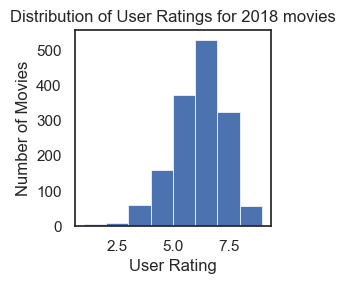

In [194]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, tzinfo, timezone


cursor = da320_database.IMDB_Pipeline.find({
    'release_date': {
        '$gte': datetime(2018, 1, 1, 0, 0, 0, tzinfo=timezone.utc), 
        '$lt': datetime(2019, 1, 1, 0, 0, 0, tzinfo=timezone.utc)
    }
})
filtered_year = pd.DataFrame(cursor)
fig, ax = plt.subplots()
ax.hist(filtered_year['user_rating'], bins=8, linewidth=0.5, edgecolor="white")
ax.set_title('Distribution of User Ratings for 2018 movies')
ax.set_ylabel('Number of Movies')
ax.set_xlabel('User Rating')
plt.show()

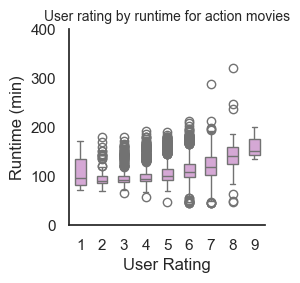

In [195]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn

cursor = da320_database.IMDB_Pipeline.find({'genres': {'$in': ['Action']}})
df = pd.DataFrame(cursor)
plt.ylim(0,400)
seaborn.despine()
plt.title('User rating by runtime for action movies', fontsize = 10)
plt.ylabel('Runtime (min)')
plt.xlabel('User Rating')
seaborn.boxplot(y='runtime', x='user_rating', data= df, color="plum", orient='v', width=.5)
plt.show()

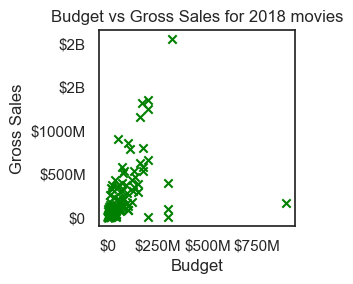

In [198]:
import matplotlib.pyplot as plt
from datetime import datetime, tzinfo, timezone
cursor = da320_database.IMDB_Pipeline.find(
{
    'release_date': {
        '$gte': datetime(2018, 1, 1, 0, 0, 0, tzinfo=timezone.utc), 
        '$lt': datetime(2019, 1, 1, 0, 0, 0, tzinfo=timezone.utc)
    }
}
)
filtered_year = pd.DataFrame(cursor)
def format_currency(amount, _):
    if amount > 1_000_000_000_000:
        return f"${round(amount / 1_000_000_000_000)}T"
    elif amount > 1_000_000_000:
        return f"${round(amount / 1_000_000_000)}B"
    elif amount > 1_000_000:
        return f"${round(amount / 1_000_000)}M"
    elif amount > 1_000:
        return f"${round(amount / 1_000)}K"
    else:
        return f"${round(amount)}"
plt.scatter(filtered_year['budget'], filtered_year['gross_sales'], color='Green', marker= 'x')
plt.title('Budget vs Gross Sales for 2018 movies')
plt.xlabel('Budget')
plt.ylabel('Gross Sales')
plt.gca().xaxis.set_major_formatter(format_currency)
plt.gca().yaxis.set_major_formatter(format_currency)
plt.show()

The first chart plots a histogram of user ratings for 2018 movies. The first thing I noticed is that there are very little movies with a low user rating or a high user rating. It would seem based on this that it would take a lot to get a very high or very low user rating. 
The second chart plots user rating vs runtime for action movies. I notice that there seems to be a trend of higher rated movies having longer runtimes. It also seems like the movies with high and low user ratings have less variability then movies for other runtimes however I suspect this could be because there are less of these movies in general. 
The last chart is a scatter plot of budget vs gross slaes for movies released in 2018. There seems to be a upward trend which indicates the bigger the movie budget the higher the gross sales. There also seem to be a couple outliers, these could be because they are reported in a different currency than us dollars. 